# Libraries

In [1]:
import pandas as pd
import numpy as np

from glob import glob
import sys

#data analysis and manipulation library
from IPython.display import Audio
import soundfile as sf
import librosa
# import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
import keras
#from keras.callbacks import ReducedLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, LSTM, MaxPooling1D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.utils import np_utils, to_categorical

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data

In [2]:
base_path = "C:\\Users\\hansley\\Desktop\\uni\\year 3\\Dissertation_end_of_yr_project\\data\\compiled dataset\\Compiled 5 category dataset- equal\\data"
angry = glob(base_path+"\\angry\\*.wav")
calm = glob(base_path+"\\calm\\*.wav")
disgust = glob(base_path+"\\disgust\\*.wav")
fearful = glob(base_path+"\\fearful\\*.wav")
happy = glob(base_path+"\\happy\\*.wav")
sad = glob(base_path+"\\sad\\*.wav")
surprised = glob(base_path+"\\surprised\\*.wav")
all_file = glob(base_path+"\\*\\*.wav")

# Exploratory analysis

In [4]:
import matplotlib.pyplot as plt
def barplot(num1,num2,num3,num4,num5,num6,num7):
    classes = ('angry', 'calm', 'disgust','fearful', 'happy', 'sad', 'surprised')
    y_pos = np.arange(len(classes))
    performance = [num1,num2,num3,num4,num5,num6,num7]
    plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'cyan') 
    plt.xticks(y_pos, classes)
    plt.show()
    print("===================================================================")
    index = 0
    for elem in classes:
        print("Number of ",elem," records : ", round(performance[index]))
        index= index+1
    print("===================================================================")
    
    
    
    
def graphical_representation(file_loc,label):
    raw_file, sample_rate = librosa.load(file_loc)
    #print(f"raw file : {raw_file}")
    #print(f"sample rate : {sample_rate}")
    #print("----------------------------------------")
    pd.Series(raw_file).plot(title=label)
    plt.show
    return (raw_file)


def spectrogram(file_loc,label):
    raw_file,_ = librosa.load(file_loc)
    plt.title(label)
    plt.subplot(2,1,1)
    plt.plot(pd.Series(raw_file))
    data = librosa.stft(raw_file)
    S_decibel = librosa.amplitude_to_db(np.abs(data), ref=np.max)
    S_decibel.shape
    #ploting spectrogram
    fig = plt.subplot(2,1,2)
    img = librosa.display.specshow(S_decibel,
                                   x_axis='time',
                                   y_axis='log')
    #plt.figure(figsize=(2, 1))
    plt.show
    Audio(file_loc)

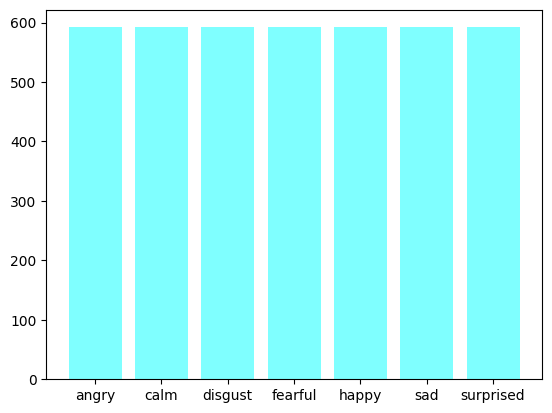

Number of  angry  records :  592
Number of  calm  records :  592
Number of  disgust  records :  592
Number of  fearful  records :  592
Number of  happy  records :  592
Number of  sad  records :  592
Number of  surprised  records :  592


In [4]:
barplot(len(angry),
        len(calm),
        len(disgust),
        len(fearful),
        len(happy),
        len(sad),
        len(surprised))

# Preprocessing

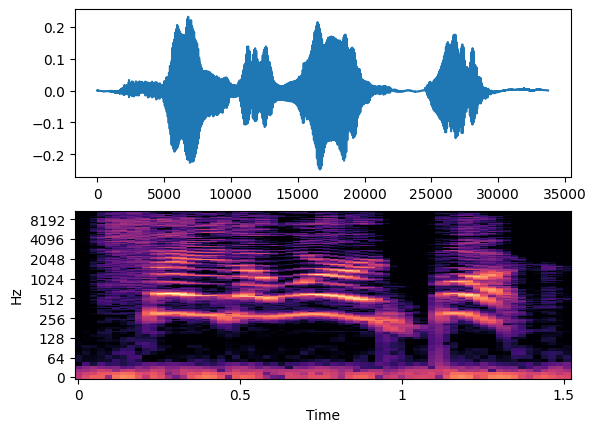

In [5]:
spectrogram(angry[1],"angry")

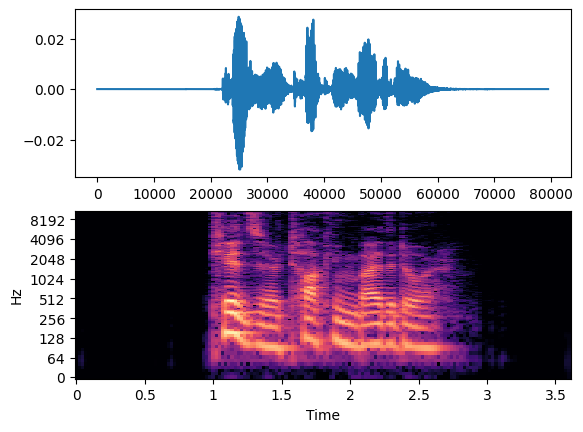

In [6]:
spectrogram(calm[1],"calm")

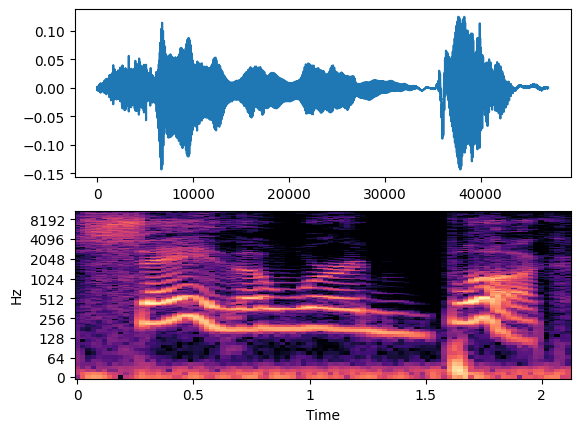

In [7]:
spectrogram(disgust[1],"disgust")

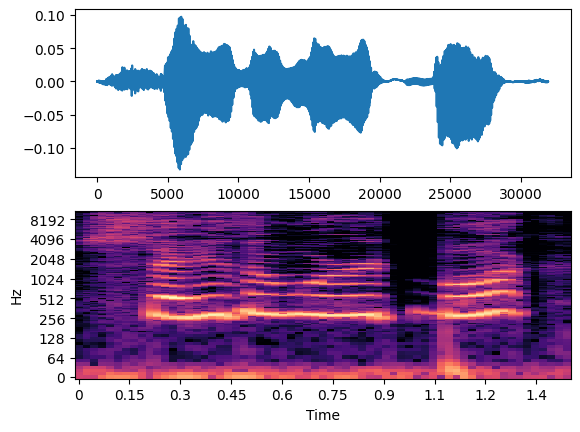

In [8]:
spectrogram(fearful[1],"fearful")

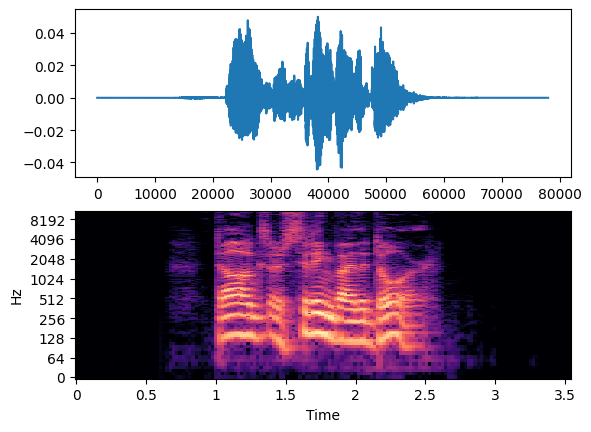

In [9]:
spectrogram(happy[1],"happy")

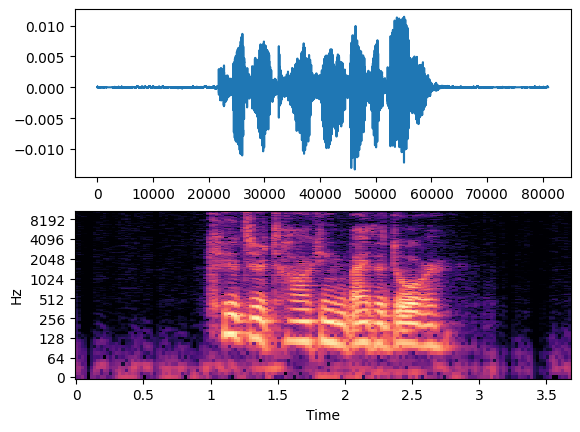

In [10]:
spectrogram(sad[1],"sad")

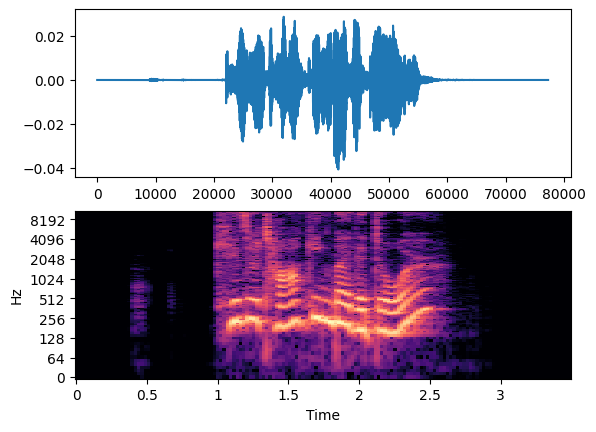

In [11]:
spectrogram(surprised[1],"surprised")

# Data Augmentation

In [12]:
temp_dir = "C:\\Users\\hansley\\Desktop\\uni\\year 3\\Dissertation_end_of_yr_project\\data\\compiled dataset\\Compiled 5 category dataset- equal\\data\\temp\\"

def add_noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data,rate=0.8)

def pitch_up(data,sample_rate):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=3,bins_per_octave=24)

def pitch_down(data,sample_rate):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=-6)

def shift(data):
    shift_range=int(np.random.uniform(low=5, high=5)*1000)
    return np.roll(data,shift_range)

def temp_save(y,sr,label, count):
    new_label = str(count)+" "+label
    sf.write((temp_dir +"\\"+new_label), y, sr)
    print("saved "+temp_dir+" "+new_label)
#     sf.write((temp_dir +"\\"+new_label+".wav"), y, sr)

def augmentation(file, label, count):
    y ,sr = librosa.load(file)
    new_data = add_noise(y)
    index_1 = str(count)+" 1"
    temp_save(new_data, sr, label, index_1)
    
    new_data = stretch(y)
    data_stretch_pitch = pitch_up(new_data, sr)
    index_2 = str(count)+" 2"
    temp_save(data_stretch_pitch, sr, label, index_2)
    
    new_data = stretch(y)
    data_stretch_pitch = pitch_down(new_data, sr)
    index_3 = str(count)+" 3"
    temp_save(data_stretch_pitch, sr, label, index_3)

In [13]:
print(len(all_file))

4144


In [14]:
count = 0

for file in angry:
    label = (file.split("\\"))[12]
    label = (label.split(" "))[2]
    augmentation(file, label, count)
    count = count + 1
    
for file in calm:
    label = (file.split("\\"))[12]
    label = (label.split(" "))[2]
    augmentation(file, label, count)
    count = count + 1
    
for file in disgust:
    label = (file.split("\\"))[12]
    label = (label.split(" "))[2]
    augmentation(file, label, count)
    count = count + 1
for file in fearful:
    label = (file.split("\\"))[12]
    label = (label.split(" "))[2]
    augmentation(file, label, count)
    count = count + 1
    
for file in happy:
    label = (file.split("\\"))[12]
    label = (label.split(" "))[2]
    augmentation(file, label, count)
    count = count + 1
    
for file in sad:
    label = (file.split("\\"))[12]
    label = (label.split(" "))[2]
    augmentation(file, label, count)
    count = count + 1
    
for file in surprised :
    label = (file.split("\\"))[12]
    label = (label.split(" "))[2]
    augmentation(file, label, count)
    count = count + 1   


saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 0 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 0 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 0 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_proje

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 19 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 19 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 19 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 20 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 20 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 20 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 36 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 37 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 37 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 37 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 38 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 38 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 54 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 54 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 55 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 55 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 55 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 56 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 72 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 72 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 73 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 73 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 73 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 74 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 90 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 91 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 91 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 91 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 92 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 92 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 108 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 108 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 109 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 109 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 109 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 110 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 127 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 127 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 128 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 128 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 128 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 129 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 145 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 146 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 146 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 146 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 147 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 147 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 163 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 163 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 164 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 164 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 164 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 165 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 181 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 182 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 182 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 182 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 183 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 183 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 199 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 199 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 200 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 200 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 200 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 201 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 218 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 218 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 218 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 219 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 219 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 219 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 235 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 236 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 236 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 236 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 237 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 237 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 254 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 254 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 255 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 255 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 255 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 256 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 273 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 273 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 274 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 274 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 274 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 275 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 291 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 291 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 292 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 292 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 292 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 293 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 309 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 309 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 310 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 310 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 310 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 311 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 327 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 327 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 328 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 328 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 328 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 329 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 346 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 346 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 347 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 347 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 347 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 348 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 365 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 366 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 366 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 366 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 367 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 367 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 384 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 384 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 385 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 385 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 385 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 386 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 402 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 403 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 403 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 403 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 404 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 404 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 420 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 421 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 421 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 421 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 422 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 422 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 438 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 438 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 439 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 439 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 439 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 440 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 456 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 457 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 457 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 457 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 458 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 458 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 474 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 475 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 475 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 475 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 476 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 476 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 492 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 493 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 493 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 493 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 494 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 494 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 510 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 511 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 511 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 511 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 512 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 512 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 528 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 528 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 529 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 529 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 529 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 530 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 547 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 547 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 548 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 548 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 548 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 549 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 565 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 565 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 566 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 566 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 566 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 567 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 583 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 583 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 584 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 584 2 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 584 3 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 585 1 angry.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 601 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 602 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 602 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 602 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 603 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 603 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 619 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 619 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 620 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 620 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 620 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 621 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 637 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 637 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 637 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 638 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 638 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 638 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 655 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 655 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 656 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 656 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 656 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 657 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 674 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 674 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 675 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 675 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 675 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 676 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 693 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 694 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 694 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 694 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 695 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 695 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 712 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 712 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 713 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 713 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 713 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 714 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 730 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 730 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 731 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 731 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 731 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 732 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 748 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 748 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 749 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 749 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 749 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 750 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 768 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 768 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 768 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 769 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 769 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 769 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 787 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 787 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 788 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 788 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 788 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 789 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 806 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 806 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 807 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 807 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 807 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 808 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 825 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 826 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 826 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 826 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 827 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 827 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 843 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 844 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 844 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 844 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 845 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 845 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 862 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 863 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 863 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 863 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 864 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 864 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 880 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 880 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 881 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 881 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 881 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 882 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 899 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 899 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 900 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 900 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 900 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 901 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 917 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 917 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 918 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 918 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 918 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 919 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 935 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 935 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 936 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 936 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 936 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 937 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 953 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 954 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 954 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 954 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 955 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 955 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 972 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 972 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 973 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 973 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 973 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 974 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 990 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 990 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 991 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 991 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 991 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 992 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1009 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1009 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1010 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1010 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1010 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1011 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1027 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1028 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1028 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1028 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1029 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1029 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1046 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1046 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1047 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1047 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1047 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1048 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1064 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1064 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1065 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1065 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1065 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1066 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1082 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1083 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1083 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1083 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1084 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1084 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1100 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1100 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1101 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1101 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1101 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1102 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1118 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1118 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1119 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1119 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1119 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1120 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1136 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1136 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1137 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1137 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1137 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1138 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1155 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1155 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1156 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1156 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1156 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1157 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1173 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1174 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1174 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1174 3 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1175 1 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1175 2 calm.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1191 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1191 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1192 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1192 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1192 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1193 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1210 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1210 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1211 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1211 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1211 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1212 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1228 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1228 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1229 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1229 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1229 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1230 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1246 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1246 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1247 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1247 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1247 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1248 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1263 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1264 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1264 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1264 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1265 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1265 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1281 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1281 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1282 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1282 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1282 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1283 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1298 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1299 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1299 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1299 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1300 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1300 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1317 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1317 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1318 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1318 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1318 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1319 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1336 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1336 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1336 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1337 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1337 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1337 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1353 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1353 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1354 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1354 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1354 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1355 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1371 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1371 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1372 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1372 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1372 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1373 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1388 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1389 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1389 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1389 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1390 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1390 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1406 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1407 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1407 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1407 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1408 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1408 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1424 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1424 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1425 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1425 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1425 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1426 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1442 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1443 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1443 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1443 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1444 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1444 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1460 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1461 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1461 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1461 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1462 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1462 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1478 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1479 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1479 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1479 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1480 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1480 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1497 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1497 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1498 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1498 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1498 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1499 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1515 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1515 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1516 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1516 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1516 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1517 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1532 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1533 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1533 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1533 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1534 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1534 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1550 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1550 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1550 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1551 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1551 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1551 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1568 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1568 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1569 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1569 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1569 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1570 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1587 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1587 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1588 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1588 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1588 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1589 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1606 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1606 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1606 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1607 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1607 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1607 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1623 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1623 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1624 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1624 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1624 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1625 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1640 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1641 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1641 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1641 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1642 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1642 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1659 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1659 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1659 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1660 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1660 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1660 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1676 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1677 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1677 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1677 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1678 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1678 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1694 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1695 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1695 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1695 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1696 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1696 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1713 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1713 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1713 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1714 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1714 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1714 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1731 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1731 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1732 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1732 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1732 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1733 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1749 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1750 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1750 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1750 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1751 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1751 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1767 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1768 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1768 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1768 3 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1769 1 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1769 2 disgust.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1785 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1786 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1786 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1786 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1787 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1787 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1803 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1803 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1804 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1804 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1804 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1805 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1821 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1821 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1822 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1822 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1822 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1823 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1839 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1839 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1840 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1840 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1840 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1841 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1857 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1857 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1858 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1858 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1858 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1859 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1875 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1876 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1876 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1876 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1877 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1877 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1895 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1895 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1895 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1896 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1896 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1896 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1912 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1913 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1913 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1913 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1914 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1914 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1931 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1931 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1931 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1932 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1932 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1932 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1948 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1948 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1949 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1949 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1949 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1950 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1967 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1967 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1968 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1968 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1968 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1969 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1986 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1986 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1987 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1987 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1987 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 1988 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2005 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2005 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2006 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2006 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2006 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2007 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2022 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2023 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2023 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2023 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2024 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2024 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2041 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2041 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2042 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2042 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2042 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2043 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2059 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2060 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2060 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2060 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2061 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2061 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2077 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2077 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2078 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2078 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2078 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2079 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2094 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2095 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2095 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2095 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2096 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2096 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2112 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2113 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2113 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2113 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2114 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2114 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2130 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2131 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2131 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2131 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2132 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2132 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2148 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2148 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2149 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2149 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2149 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2150 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2167 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2167 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2167 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2168 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2168 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2168 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2184 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2184 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2185 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2185 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2185 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2186 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2202 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2203 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2203 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2203 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2204 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2204 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2221 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2221 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2222 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2222 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2222 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2223 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2238 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2239 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2239 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2239 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2240 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2240 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2256 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2256 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2257 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2257 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2257 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2258 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2273 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2274 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2274 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2274 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2275 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2275 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2293 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2293 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2294 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2294 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2294 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2295 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2311 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2311 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2312 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2312 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2312 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2313 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2329 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2329 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2330 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2330 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2330 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2331 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2347 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2347 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2348 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2348 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2348 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2349 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2364 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2365 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2365 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2365 3 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2366 1 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2366 2 fearful.wav
saved C:\Users\hansley\Desktop\uni\year 

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2382 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2383 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2383 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2383 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2384 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2384 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2400 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2400 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2401 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2401 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2401 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2402 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2417 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2418 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2418 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2418 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2419 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2419 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2435 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2435 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2436 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2436 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2436 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2437 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2453 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2454 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2454 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2454 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2455 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2455 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2471 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2472 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2472 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2472 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2473 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2473 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2489 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2490 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2490 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2490 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2491 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2491 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2507 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2507 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2508 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2508 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2508 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2509 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2526 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2526 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2526 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2527 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2527 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2527 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2544 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2544 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2545 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2545 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2545 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2546 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2562 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2562 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2563 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2563 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2563 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2564 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2580 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2581 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2581 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2581 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2582 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2582 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2598 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2598 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2599 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2599 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2599 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2600 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2615 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2616 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2616 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2616 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2617 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2617 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2634 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2634 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2634 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2635 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2635 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2635 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2651 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2652 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2652 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2652 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2653 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2653 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2670 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2670 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2671 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2671 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2671 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2672 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2688 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2688 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2689 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2689 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2689 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2690 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2706 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2707 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2707 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2707 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2708 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2708 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2725 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2726 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2726 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2726 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2727 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2727 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2743 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2744 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2744 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2744 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2745 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2745 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2761 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2761 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2762 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2762 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2762 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2763 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2779 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2779 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2780 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2780 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2780 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2781 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2797 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2798 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2798 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2798 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2799 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2799 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2815 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2815 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2816 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2816 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2816 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2817 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2833 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2834 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2834 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2834 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2835 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2835 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2851 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2851 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2852 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2852 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2852 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2853 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2869 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2869 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2870 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2870 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2870 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2871 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2886 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2887 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2887 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2887 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2888 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2888 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2905 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2905 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2906 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2906 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2906 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2907 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2923 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2924 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2924 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2924 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2925 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2925 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2942 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2942 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2943 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2943 2 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2943 3 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2944 1 happy.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertati

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2960 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2960 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2960 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2961 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2961 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2961 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2978 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2978 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2979 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2979 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2979 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2980 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2996 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2997 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2997 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2997 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2998 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 2998 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3015 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3015 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3015 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3016 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3016 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3016 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3033 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3033 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3034 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3034 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3034 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3035 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3051 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3052 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3052 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3052 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3053 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3053 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3069 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3069 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3070 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3070 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3070 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3071 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3088 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3088 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3089 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3089 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3089 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3090 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3107 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3107 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3108 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3108 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3108 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3109 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3126 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3126 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3127 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3127 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3127 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3128 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3144 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3145 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3145 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3145 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3146 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3146 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3162 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3162 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3163 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3163 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3163 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3164 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3180 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3181 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3181 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3181 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3182 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3182 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3198 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3199 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3199 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3199 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3200 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3200 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3216 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3216 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3217 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3217 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3217 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3218 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3234 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3234 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3235 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3235 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3235 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3236 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3253 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3253 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3253 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3254 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3254 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3254 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3271 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3272 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3272 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3272 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3273 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3273 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3289 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3290 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3290 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3290 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3291 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3291 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3307 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3308 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3308 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3308 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3309 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3309 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3325 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3325 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3326 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3326 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3326 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3327 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3343 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3344 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3344 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3344 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3345 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3345 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3362 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3362 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3363 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3363 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3363 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3364 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3380 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3381 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3381 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3381 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3382 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3382 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3399 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3400 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3400 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3400 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3401 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3401 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3418 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3419 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3419 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3419 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3420 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3420 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3436 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3437 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3437 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3437 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3438 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3438 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3454 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3454 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3455 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3455 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3455 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3456 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3473 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3474 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3474 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3474 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3475 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3475 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3492 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3493 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3493 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3493 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3494 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3494 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3511 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3511 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3512 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3512 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3512 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3513 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3529 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3530 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3530 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3530 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3531 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3531 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3547 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3547 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3548 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3548 2 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3548 3 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3549 1 sad.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3565 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3566 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3566 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3566 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3567 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3567 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3582 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3583 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3583 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3583 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3584 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3584 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3600 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3601 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3601 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3601 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3602 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3602 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3618 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3619 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3619 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3619 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3620 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3620 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3636 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3637 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3637 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3637 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3638 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3638 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3654 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3655 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3655 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3655 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3656 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3656 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3672 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3673 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3673 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3673 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3674 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3674 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3690 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3690 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3691 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3691 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3691 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3692 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3707 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3707 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3708 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3708 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3708 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3709 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3724 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3725 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3725 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3725 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3726 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3726 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3742 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3743 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3743 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3743 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3744 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3744 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3760 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3761 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3761 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3761 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3762 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3762 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3777 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3778 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3778 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3778 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3779 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3779 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3795 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3795 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3796 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3796 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3796 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3797 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3813 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3814 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3814 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3814 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3815 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3815 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3831 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3831 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3832 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3832 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3832 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3833 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3848 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3848 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3849 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3849 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3849 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3850 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3865 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3866 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3866 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3866 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3867 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3867 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3882 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3883 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3883 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3883 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3884 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3884 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3900 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3900 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3901 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3901 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3901 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3902 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3917 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3917 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3918 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3918 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3918 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3919 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3934 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3934 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3935 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3935 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3935 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3936 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3952 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3952 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3953 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3953 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3953 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3954 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3969 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3970 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3970 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3970 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3971 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3971 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3987 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3987 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3988 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3988 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3988 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 3989 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4004 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4004 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4005 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4005 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4005 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4006 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4021 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4022 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4022 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4022 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4023 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4023 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4038 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4039 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4039 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4039 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4040 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4040 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4055 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4056 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4056 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4056 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4057 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4057 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4073 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4073 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4074 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4074 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4074 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4075 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4090 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4091 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4091 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4091 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4092 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4092 2 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4108 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4108 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4109 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4109 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4109 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4110 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4125 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4125 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4126 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4126 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4126 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4127 1 surprised.wav
saved C:\Users\hansley\Deskt

saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4142 3 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4143 1 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4143 2 surprised.wav
saved C:\Users\hansley\Desktop\uni\year 3\Dissertation_end_of_yr_project\data\compiled dataset\Compiled 5 category dataset- equal\data\temp\ 4143 3 surprised.wav


In [15]:
print(len(all_file))

4144


In [6]:
angry_rec, calm_rec, disgust_rec,fear_rec,happy_rec,sad_rec,surprised_rec = 0,0,0,0,0,0,0
all_file = glob(base_path+"\\*\\*.wav")
for file in all_file:
    label = (file.split("\\"))[12]
    label = (label.split(" "))[2]
    label = (label.split("."))[0]
    if label == "angry":
        angry_rec = angry_rec + 1
    if label == "calm":
        calm_rec = calm_rec + 1
    if label == "disgust":
        disgust_rec = disgust_rec + 1
    if label == "fearful":
        fear_rec = fear_rec + 1
    if label == "happy":
        happy_rec = happy_rec + 1
    if label == "sad":
        sad_rec = sad_rec + 1
    if label == "surprised":
        surprised_rec = surprised_rec + 1

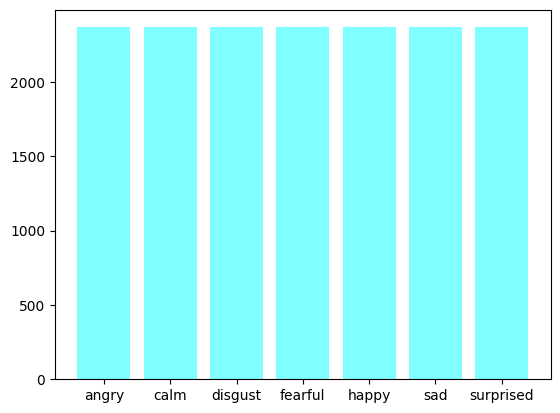

Number of  angry  records :  2368
Number of  calm  records :  2368
Number of  disgust  records :  2368
Number of  fearful  records :  2368
Number of  happy  records :  2368
Number of  sad  records :  2368
Number of  surprised  records :  2368


In [7]:
barplot(angry_rec,
        calm_rec,
        disgust_rec,
        fear_rec,
        happy_rec,
        sad_rec,
        surprised_rec)

# Extract data

In [8]:
# Preprocessing function
# Extract ZCR, RMS, Chroma_Stft, MFCC and mel spectrogram and add the values to 4 distinct numpy array.
# Return 4 numpy array
def preprocess(data, sample_rate):
   
    res_1 = np.array([])
    res_2 = np.array([])
    res_3 = np.array([])
    res_4 = np.array([])
    
    # ZCR - rate at which audio linetract intersect the 0 line while diring amplitude change
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    res_1=np.hstack((res_1, zcr[0])) # stacking horizontally
    
    # Root Mean Square Values extraction
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    res_1=np.hstack((res_1, rms[0])) # stacking horizontally

    # Chroma_stft - use to analyse the "pitches class profile" of audios
    # Chroma_stft Values extraction
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    
    # stacking horizontally
    for element in chroma_stft:
        res_2=np.hstack((res_2, element))

    # MFCC Values extraction
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    # stacking horizontally
    for element in mfcc:
        res_3=np.hstack((res_3, element))

    # MelSpectogram Values extraction
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    # stacking horizontally
    for element in mel:
        res_4=np.hstack((res_4, element))
       
    
    return(res_1,res_2,res_3,res_4)

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3)

    return(preprocess(data, sample_rate))

In [9]:
# X = results horizontallys stacked 
# Y = Labels
ZCR_RMS, STFT, MFCC, Mel, Y = [], [], [], [], []   
num=0
for file in all_file:
    label = (file.split("\\"))[12]
    label = (label.split(" "))[2]
    label = (label.split("."))[0]
    #feature = (original file result, noise data result and stretched pitched data)
    feature_0, feature_1, feature_2, feature_3 = get_features(file)
    
    ZCR_RMS.append(feature_0)
    STFT.append(feature_1)
    MFCC.append(feature_2)
    Mel.append(feature_3)
    Y.append(label)
    num=num+1
    
ZCR_RMS, STFT, MFCC, Mel = np.array(ZCR_RMS), np.array(STFT), np.array(MFCC), np.array(Mel)

In [10]:
print(ZCR_RMS.shape, STFT.shape, MFCC.shape, Mel.shape)

(16576, 2) (16576, 12) (16576, 20) (16576, 128)


In [11]:
ZCR_RMS[0]

array([0.085165  , 0.04158953])

In [12]:
df=pd.DataFrame()
#print(len(STFT.shape))
df['ZCR_RMS'] = ZCR_RMS.tolist()
df['STFT'] = STFT.tolist()
df['MFCC'] = MFCC.tolist()
df['mel_spectrogram'] = Mel .tolist()
df['labels'] = Y

df.head()

,ZCR_RMS,STFT,MFCC,mel_spectrogram,labels
0,"[0.08516499533582089, 0.04158952832221985]","[0.6174022555351257, 0.654032826423645, 0.4358...","[-383.4326171875, 52.460811614990234, -17.6089...","[0.04151472821831703, 0.002757910406216979, 0....",angry
1,"[0.08841589725378787, 0.03494309261441231]","[0.47533854842185974, 0.5495786666870117, 0.65...","[-401.8309326171875, 44.440391540527344, -5.89...","[0.08662480860948563, 0.0009482315508648753, 0...",angry
2,"[0.10607580236486487, 0.017533455044031143]","[0.6965097188949585, 0.6015957593917847, 0.410...","[-444.1842346191406, 47.43931579589844, -5.366...","[0.05087785795331001, 0.0005975747480988503, 2...",angry
3,"[0.09378756009615384, 0.02844979614019394]","[0.42856457829475403, 0.678777277469635, 0.446...","[-403.9179992675781, 57.67206573486328, -12.81...","[0.0622786283493042, 0.0009274347103200853, 4....",angry
4,"[0.07909427472014925, 0.028094088658690453]","[0.5797451734542847, 0.6031532287597656, 0.434...","[-404.9365234375, 57.77289581298828, -1.238416...","[0.06408895552158356, 0.0005266386433504522, 4...",angry


# Prepare data

In [13]:
# Shuffle the data
df = shuffle(df)

X1 = df['ZCR_RMS'].values
X2 = df['STFT'].values
X3 = df['MFCC'].values
X4 = df['mel_spectrogram'].values
Y = df['labels'].values

In [14]:
df_X, df_Y = df.iloc[: ,:-1], df['labels']

In [15]:
Y = df['labels'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

print(len(Y))
print(Y)

16576
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [16]:
# splitting data (80:20)
data_split = (round(len(df)*0.8))
df_train, df_test = df_X[:data_split] , df_X[data_split:]

x_train_ZCR_RMS , x_test_ZCR_RMS = np.array((df_train['ZCR_RMS'].values).tolist()), np.array((df_test['ZCR_RMS'].values).tolist())
x_train_STFT , x_test_STFT = np.array((df_train['STFT'].values).tolist()), np.array((df_test['STFT'].values).tolist())
x_train_MFCC , x_test_MFCC = np.array((df_train['MFCC'].values).tolist()), np.array((df_test['MFCC'].values).tolist())
x_train_Mel , x_test_Mel = np.array((df_train['mel_spectrogram'].values).tolist()), np.array((df_test['mel_spectrogram'].values).tolist())

y_train, y_test = Y[:data_split], Y[data_split:]

#df_train.head()

print(x_train_ZCR_RMS.shape, x_train_STFT.shape, x_train_MFCC.shape, x_train_Mel.shape, y_train.shape)
print(x_test_ZCR_RMS.shape, x_test_STFT.shape, x_test_MFCC.shape, x_test_Mel.shape, y_test.shape)

(13261, 2) (13261, 12) (13261, 20) (13261, 128) (13261, 7)
(3315, 2) (3315, 12) (3315, 20) (3315, 128) (3315, 7)


In [17]:
# x_train_ZCR_RMS = np.expand_dims(x_train_ZCR_RMS, axis=2)
# x_train_STFT = np.expand_dims(x_train_STFT, axis=2)
# x_train_MFCC = np.expand_dims(x_train_MFCC, axis=2)
# x_train_Mel = np.expand_dims(x_train_Mel, axis=2)


# x_test_ZCR_RMS = np.expand_dims(x_test_ZCR_RMS, axis=2)
# x_test_STFT = np.expand_dims(x_test_STFT, axis=2)
# x_test_MFCC = np.expand_dims(x_test_MFCC, axis=2)
# x_test_Mel = np.expand_dims(x_test_Mel, axis=2)

print(x_train_ZCR_RMS.shape, x_train_STFT.shape, x_train_MFCC.shape, x_train_Mel.shape, y_train.shape)
print(x_test_ZCR_RMS.shape, x_test_STFT.shape, x_test_MFCC.shape, x_test_Mel.shape, y_test.shape)

(13261, 2) (13261, 12) (13261, 20) (13261, 128) (13261, 7)
(3315, 2) (3315, 12) (3315, 20) (3315, 128) (3315, 7)


In [18]:
print(x_train_ZCR_RMS[0].shape, x_train_STFT[0].shape, x_train_MFCC[0].shape, x_train_Mel[0].shape, y_train[0].shape)

(2,) (12,) (20,) (128,) (7,)


# Model

In [34]:
from tensorflow.keras.layers import concatenate
# define sets of inputs
inputZCR = keras.Input(shape=(x_train_ZCR_RMS[0].shape))
inputSTFT = keras.Input(shape=(x_train_STFT[0].shape))
inputMFCC = keras.Input(shape=(x_train_MFCC[0].shape))
inputMEL = keras.Input(shape=(x_train_Mel[0].shape))

# the first branch operates on the first input
ZCR = Dense(2, activation="relu")(inputZCR)
ZCR = Dense(14, activation="relu")(ZCR)
ZCR = Flatten()(ZCR)
ZCR = Dense(7, activation="relu")(ZCR)
ZCR = keras.Model(inputs=inputZCR, outputs=ZCR)

# the second branch opreates on the second input
#STFT = Conv1D(16, 1, padding='same', activation='relu')(inputSTFT)
#STFT = Flatten()(STFT)
STFT = Dense(12, activation="relu")(inputSTFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dropout(0.2)(STFT)
STFT = Flatten()(STFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dense(7, activation="relu")(STFT)
STFT = keras.Model(inputs=inputSTFT, outputs=STFT)

# the third branch opreates on the third input
#MFCC = Conv1D(32, 1, padding='same', activation='relu')(inputMFCC)
#MFCC = Flatten()(MFCC)
MFCC = Dense(40, activation="relu")(inputMFCC)
MFCC = Flatten()(MFCC)
MFCC = Dense(7, activation="relu")(MFCC)
MFCC = keras.Model(inputs=inputMFCC, outputs=MFCC)

# the forth branch opreates on the forth input
MEL = Dense(256, activation="relu")(inputMEL)
MEL = Dense(128, activation="relu")(MEL)
MEL = Flatten()(MEL)
MEL = Dense(256, activation="relu")(MEL)
MEL = Dropout(0.2)(MEL)
MEL = Dense(64, activation="relu")(MEL)
MEL = Dense(16, activation="relu")(MEL)
MEL = Dense(7, activation="relu")(MEL)
MEL = keras.Model(inputs=inputMEL, outputs=MEL)

print(ZCR.output.shape)
print(STFT.output.shape)

print(MFCC.output.shape)
print(MEL.output.shape)

# combine the output of the two branches
combined_1 = concatenate([ZCR.output, STFT.output])
combined_2 = concatenate([MFCC.output, MEL.output])
combined = concatenate([combined_1, combined_2])

# combined outputs
out = Dense(28, activation="relu")(combined)
out = Dense(56, activation="relu")(out)
out = Dense(14, activation="relu")(out)
out = Dense(7, activation="softmax")(out)

# our model will accept the inputs of the two branches and
# then output a single value
model = keras.Model(inputs=[ZCR.input, STFT.input,MFCC.input,MEL.input], outputs=out)

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

model.summary()

(None, 7)
(None, 7)
(None, 7)
(None, 7)
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 dense_28 (Dense)               (None, 256)          33024       ['input_8[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense_29 (Dense)               (None, 128)          32896       ['dense_28[0][0]']               
                                                    

# Training

In [35]:
training_set = [x_train_ZCR_RMS, x_train_STFT, x_train_MFCC, x_train_Mel]
testing_set = [x_test_ZCR_RMS, x_test_STFT, x_test_MFCC, x_test_Mel]

hist = model.fit(x=training_set,y=y_train,
                 batch_size = 32, epochs = 300,
                 validation_data=(testing_set, y_test))

Epoch 1/300
104/104 [==============================] - 6s 23ms/step - loss: 2.7844 - acc: 0.2576 - val_loss: 1.5735 - val_acc: 0.3744
Epoch 2/300
104/104 [==============================] - 2s 15ms/step - loss: 1.4585 - acc: 0.4058 - val_loss: 1.3538 - val_acc: 0.4570
Epoch 3/300
104/104 [==============================] - 2s 16ms/step - loss: 1.2599 - acc: 0.5141 - val_loss: 1.1378 - val_acc: 0.6081
Epoch 4/300
104/104 [==============================] - 2s 15ms/step - loss: 1.0707 - acc: 0.6319 - val_loss: 0.9935 - val_acc: 0.6600
Epoch 5/300
104/104 [==============================] - 2s 15ms/step - loss: 0.9681 - acc: 0.6644 - val_loss: 0.9167 - val_acc: 0.6787
Epoch 6/300
104/104 [==============================] - 2s 15ms/step - loss: 0.8739 - acc: 0.6874 - val_loss: 0.8602 - val_acc: 0.7005
Epoch 7/300
104/104 [==============================] - 2s 16ms/step - loss: 0.8087 - acc: 0.7114 - val_loss: 0.8346 - val_acc: 0.7035
Epoch 8/300
104/104 [==============================] - 2s 16ms

Epoch 62/300
104/104 [==============================] - 2s 16ms/step - loss: 0.2815 - acc: 0.8985 - val_loss: 0.7283 - val_acc: 0.8103
Epoch 63/300
104/104 [==============================] - 2s 15ms/step - loss: 0.2543 - acc: 0.9039 - val_loss: 0.7303 - val_acc: 0.8157
Epoch 64/300
104/104 [==============================] - 2s 15ms/step - loss: 0.2392 - acc: 0.9082 - val_loss: 0.7332 - val_acc: 0.8190
Epoch 65/300
104/104 [==============================] - 2s 15ms/step - loss: 0.2299 - acc: 0.9133 - val_loss: 0.7301 - val_acc: 0.8220
Epoch 66/300
104/104 [==============================] - 2s 16ms/step - loss: 0.2344 - acc: 0.9090 - val_loss: 0.8264 - val_acc: 0.8124
Epoch 67/300
104/104 [==============================] - 2s 16ms/step - loss: 0.2405 - acc: 0.9088 - val_loss: 0.8191 - val_acc: 0.8118
Epoch 68/300
104/104 [==============================] - 2s 16ms/step - loss: 0.2580 - acc: 0.9039 - val_loss: 0.7762 - val_acc: 0.8169
Epoch 69/300
104/104 [==============================] -

104/104 [==============================] - 2s 17ms/step - loss: 0.1161 - acc: 0.9561 - val_loss: 1.0222 - val_acc: 0.8377
Epoch 183/300
104/104 [==============================] - 2s 15ms/step - loss: 0.1090 - acc: 0.9577 - val_loss: 1.0266 - val_acc: 0.8383
Epoch 184/300
104/104 [==============================] - 2s 16ms/step - loss: 0.1074 - acc: 0.9563 - val_loss: 1.0837 - val_acc: 0.8398
Epoch 185/300
104/104 [==============================] - 2s 15ms/step - loss: 0.1055 - acc: 0.9590 - val_loss: 1.1016 - val_acc: 0.8326
Epoch 186/300
104/104 [==============================] - 2s 15ms/step - loss: 0.1018 - acc: 0.9596 - val_loss: 1.0426 - val_acc: 0.8392
Epoch 187/300
104/104 [==============================] - 2s 17ms/step - loss: 0.1129 - acc: 0.9575 - val_loss: 1.0485 - val_acc: 0.8296
Epoch 188/300
104/104 [==============================] - 2s 16ms/step - loss: 0.1186 - acc: 0.9548 - val_loss: 1.2662 - val_acc: 0.8175
Epoch 189/300
104/104 [==============================] - 2s 15

In [36]:
print("Accuracy of our model on test data : " , model.evaluate(testing_set,y_test)[1]*100 , "%")

104/104 [==============================] - 1s 6ms/step - loss: 1.2051 - acc: 0.8410
Accuracy of our model on test data :  84.10256505012512 %


<function matplotlib.pyplot.show(close=None, block=None)>

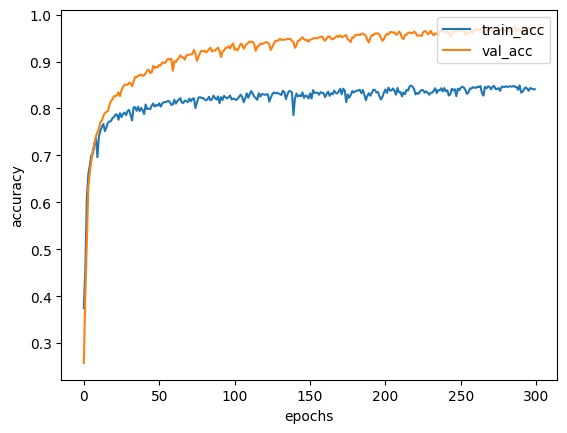

In [37]:
#plot graph
epochs = list(range(100))
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['acc'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show

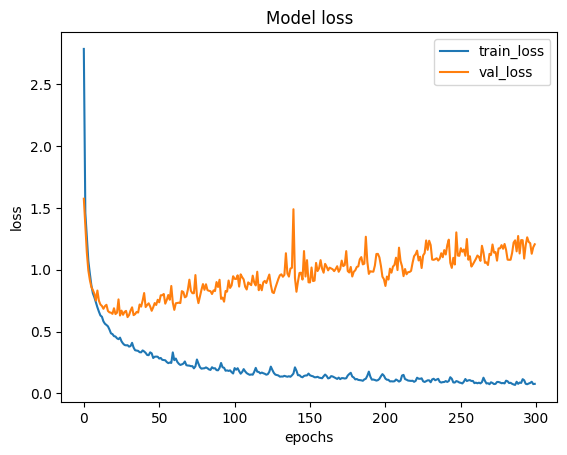

In [38]:
# plot the training artifacts
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [39]:
pred_test = model.predict(testing_set)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)

104/104 [==============================] - 1s 5ms/step


In [40]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()

df.head(20)

,Predicted Labels,Actual Labels
0,calm,calm
1,angry,angry
2,fearful,fearful
3,surprised,surprised
4,sad,sad
5,sad,sad
6,sad,sad
7,happy,happy
8,happy,happy
9,calm,sad


In [41]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

       angry       0.87      0.88      0.87       486
        calm       0.89      0.92      0.90       464
     disgust       0.79      0.83      0.81       482
     fearful       0.83      0.86      0.84       479
       happy       0.84      0.78      0.81       450
         sad       0.83      0.84      0.83       497
   surprised       0.85      0.78      0.81       457

    accuracy                           0.84      3315
   macro avg       0.84      0.84      0.84      3315
weighted avg       0.84      0.84      0.84      3315



In [42]:
tf.keras.models.save_model(model, 'model_multi_input_2.h5')
#new_model = tf.keras.models.load_model('model_merged_2.h5',
#                                       custom_objects={'CustomLayer': CustomLayer})
new_model = tf.keras.models.load_model('model_multi_input_2.h5')
print(new_model.summary())

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 dense_28 (Dense)               (None, 256)          33024       ['input_8[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense_29 (Dense)               (None, 128)          32896       ['dense_28[0][0]']               
                                                                                            

# MODEL 

In [22]:
from tensorflow.keras.layers import concatenate
# define sets of inputs
inputZCR = keras.Input(shape=(x_train_ZCR_RMS[0].shape))
inputSTFT = keras.Input(shape=(x_train_STFT[0].shape))
inputMFCC = keras.Input(shape=(x_train_MFCC[0].shape))
inputMEL = keras.Input(shape=(x_train_Mel[0].shape))

# the first branch operates on the first input
ZCR = Dense(2, activation="relu")(inputZCR)
ZCR = Dense(14, activation="relu")(ZCR)
ZCR = Flatten()(ZCR)
ZCR = Dense(7, activation="relu")(ZCR)
ZCR = keras.Model(inputs=inputZCR, outputs=ZCR)

# the second branch opreates on the second input
#STFT = Conv1D(16, 1, padding='same', activation='relu')(inputSTFT)
#STFT = Flatten()(STFT)
STFT = Dense(12, activation="relu")(inputSTFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dropout(0.2)(STFT)
STFT = Flatten()(STFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dense(7, activation="relu")(STFT)
STFT = keras.Model(inputs=inputSTFT, outputs=STFT)

# the third branch opreates on the third input
#MFCC = Conv1D(32, 1, padding='same', activation='relu')(inputMFCC)
#MFCC = Flatten()(MFCC)
MFCC = Dense(40, activation="relu")(inputMFCC)
MFCC = Flatten()(MFCC)
MFCC = Dense(7, activation="relu")(MFCC)
MFCC = keras.Model(inputs=inputMFCC, outputs=MFCC)

# the forth branch opreates on the forth input
MEL = Dense(256, activation="relu")(inputMEL)
MEL = Dense(128, activation="relu")(MEL)
MEL = Flatten()(MEL)
MEL = Dense(256, activation="relu")(MEL)
MEL = Dropout(0.2)(MEL)
MEL = Dense(64, activation="relu")(MEL)
MEL = Dense(16, activation="relu")(MEL)
MEL = Dense(7, activation="relu")(MEL)
MEL = keras.Model(inputs=inputMEL, outputs=MEL)

print(ZCR.output.shape)
print(STFT.output.shape)

print(MFCC.output.shape)
print(MEL.output.shape)

# combine the output of the two branches
combined_1 = concatenate([ZCR.output, STFT.output])
combined_2 = concatenate([MFCC.output, MEL.output])
combined = concatenate([combined_1, combined_2])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(28, activation="relu")(combined)
z = Dense(56, activation="relu")(z)
#z = Dense(28, activation="relu")(z)
z = Dense(14, activation="relu")(z)
z = Dense(7, activation="softmax")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model2 = keras.Model(inputs=[ZCR.input, STFT.input,MFCC.input,MEL.input], outputs=z)

opt = keras.optimizers.Adam(learning_rate=0.003)
model2.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

model2.summary()

(None, 7)
(None, 7)
(None, 7)
(None, 7)
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 dense_47 (Dense)               (None, 256)          33024       ['input_12[0][0]']               
                                                                                                  
 input_10 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_48 (Dense)               (None, 128)          32896       ['dense_47[0][0]']               
                                                   

In [23]:
training_set = [x_train_ZCR_RMS, x_train_STFT, x_train_MFCC, x_train_Mel]
testing_set = [x_test_ZCR_RMS, x_test_STFT, x_test_MFCC, x_test_Mel]

hist2 = model2.fit(x=training_set,y=y_train,
                 batch_size = 64, epochs = 300,
                 validation_data=(testing_set, y_test))

Epoch 1/300
208/208 [==============================] - 3s 8ms/step - loss: 1.8716 - acc: 0.2887 - val_loss: 1.3864 - val_acc: 0.4670
Epoch 2/300
208/208 [==============================] - 1s 5ms/step - loss: 1.2520 - acc: 0.5273 - val_loss: 1.1695 - val_acc: 0.5750
Epoch 3/300
208/208 [==============================] - 1s 5ms/step - loss: 1.0275 - acc: 0.6306 - val_loss: 1.0137 - val_acc: 0.6449
Epoch 4/300
208/208 [==============================] - 1s 5ms/step - loss: 0.9253 - acc: 0.6717 - val_loss: 0.9449 - val_acc: 0.6552
Epoch 5/300
208/208 [==============================] - 1s 5ms/step - loss: 0.8200 - acc: 0.7073 - val_loss: 0.8778 - val_acc: 0.6842
Epoch 6/300
208/208 [==============================] - 1s 5ms/step - loss: 0.7614 - acc: 0.7260 - val_loss: 0.8041 - val_acc: 0.7110
Epoch 7/300
208/208 [==============================] - 1s 5ms/step - loss: 0.6913 - acc: 0.7483 - val_loss: 0.7909 - val_acc: 0.7173
Epoch 8/300
208/208 [==============================] - 1s 5ms/step - 

208/208 [==============================] - 1s 5ms/step - loss: 0.1817 - acc: 0.9374 - val_loss: 0.8871 - val_acc: 0.8142
Epoch 124/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1716 - acc: 0.9392 - val_loss: 0.8473 - val_acc: 0.8187
Epoch 125/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1481 - acc: 0.9465 - val_loss: 1.0383 - val_acc: 0.8163
Epoch 126/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1494 - acc: 0.9436 - val_loss: 0.8920 - val_acc: 0.8148
Epoch 127/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1587 - acc: 0.9425 - val_loss: 0.8907 - val_acc: 0.8148
Epoch 128/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1657 - acc: 0.9413 - val_loss: 0.9959 - val_acc: 0.8160
Epoch 129/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1644 - acc: 0.9398 - val_loss: 0.8866 - val_acc: 0.8178
Epoch 130/300
208/208 [==============================] - 1s 6ms/step 

Epoch 184/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1696 - acc: 0.9434 - val_loss: 0.9774 - val_acc: 0.8184
Epoch 185/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1780 - acc: 0.9427 - val_loss: 0.9040 - val_acc: 0.8220
Epoch 186/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1415 - acc: 0.9496 - val_loss: 1.0066 - val_acc: 0.8217
Epoch 187/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1457 - acc: 0.9480 - val_loss: 0.9410 - val_acc: 0.8205
Epoch 188/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1381 - acc: 0.9517 - val_loss: 1.1349 - val_acc: 0.8278
Epoch 189/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1416 - acc: 0.9503 - val_loss: 1.0803 - val_acc: 0.8241
Epoch 190/300
208/208 [==============================] - 1s 5ms/step - loss: 0.1328 - acc: 0.9517 - val_loss: 1.0803 - val_acc: 0.8214
Epoch 191/300
208/208 [==============================] 

In [24]:
print("Accuracy of our model on test data : " , model2.evaluate(testing_set,y_test)[1]*100 , "%")

104/104 [==============================] - 0s 3ms/step - loss: 0.8826 - acc: 0.8009
Accuracy of our model on test data :  80.09049892425537 %


<function matplotlib.pyplot.show(close=None, block=None)>

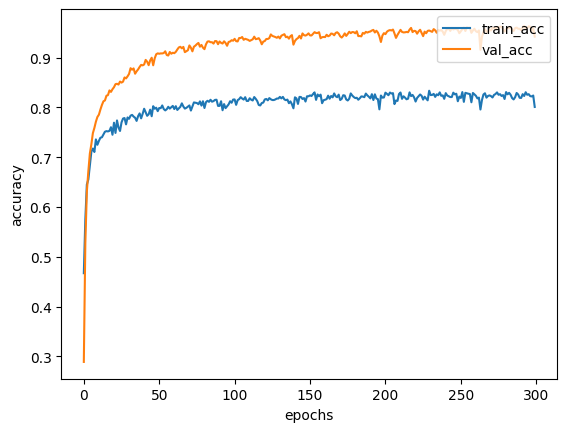

In [25]:
#plot graph
epochs = list(range(100))
plt.plot(hist2.history['val_acc'])
plt.plot(hist2.history['acc'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show

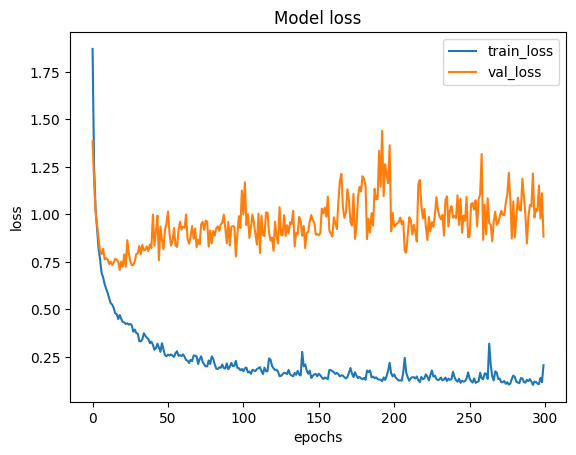

In [26]:
# plot the training artifacts
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [27]:
pred_test = model2.predict(testing_set)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)

104/104 [==============================] - 0s 2ms/step


In [28]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()
df.head(20)

,Predicted Labels,Actual Labels
0,disgust,disgust
1,happy,happy
2,sad,sad
3,disgust,happy
4,sad,sad
5,surprised,surprised
6,disgust,disgust
7,sad,sad
8,calm,fearful
9,calm,calm


In [29]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

       angry       0.87      0.84      0.85       489
        calm       0.75      0.97      0.85       434
     disgust       0.81      0.74      0.77       502
     fearful       0.70      0.81      0.75       447
       happy       0.82      0.72      0.77       488
         sad       0.85      0.78      0.81       486
   surprised       0.83      0.78      0.80       469

    accuracy                           0.80      3315
   macro avg       0.80      0.80      0.80      3315
weighted avg       0.81      0.80      0.80      3315



In [30]:
from tensorflow.keras.layers import concatenate
# define sets of inputs
inputZCR = keras.Input(shape=(x_train_ZCR_RMS[0].shape))
inputSTFT = keras.Input(shape=(x_train_STFT[0].shape))
inputMFCC = keras.Input(shape=(x_train_MFCC[0].shape))
inputMEL = keras.Input(shape=(x_train_Mel[0].shape))

# the first branch operates on the first input
ZCR = Dense(2, activation="relu")(inputZCR)
ZCR = Dense(14, activation="relu")(ZCR)
ZCR = Flatten()(ZCR)
ZCR = Dense(7, activation="relu")(ZCR)
ZCR = keras.Model(inputs=inputZCR, outputs=ZCR)

# the second branch opreates on the second input
#STFT = Conv1D(16, 1, padding='same', activation='relu')(inputSTFT)
#STFT = Flatten()(STFT)
STFT = Dense(12, activation="relu")(inputSTFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dropout(0.2)(STFT)
STFT = Flatten()(STFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dense(7, activation="relu")(STFT)
STFT = keras.Model(inputs=inputSTFT, outputs=STFT)

# the third branch opreates on the third input
#MFCC = Conv1D(32, 1, padding='same', activation='relu')(inputMFCC)
#MFCC = Flatten()(MFCC)
MFCC = Dense(40, activation="relu")(inputMFCC)
MFCC = Flatten()(MFCC)
MFCC = Dense(7, activation="relu")(MFCC)
MFCC = keras.Model(inputs=inputMFCC, outputs=MFCC)

# the forth branch opreates on the forth input
MEL = Dense(256, activation="relu")(inputMEL)
MEL = Dense(128, activation="relu")(MEL)
MEL = Flatten()(MEL)
MEL = Dense(256, activation="relu")(MEL)
MEL = Dropout(0.2)(MEL)
MEL = Dense(64, activation="relu")(MEL)
MEL = Dense(16, activation="relu")(MEL)
MEL = Dense(7, activation="relu")(MEL)
MEL = keras.Model(inputs=inputMEL, outputs=MEL)

print(ZCR.output.shape)
print(STFT.output.shape)

print(MFCC.output.shape)
print(MEL.output.shape)

# combine the output of the two branches
combined_1 = concatenate([ZCR.output, STFT.output])
combined_2 = concatenate([MFCC.output, MEL.output])
combined = concatenate([combined_1, combined_2])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(28, activation="relu")(combined)
z = Dense(56, activation="relu")(z)
#z = Dense(28, activation="relu")(z)
z = Dense(14, activation="relu")(z)
z = Dense(7, activation="softmax")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model3 = keras.Model(inputs=[ZCR.input, STFT.input,MFCC.input,MEL.input], outputs=z)

opt = keras.optimizers.Adam(learning_rate=0.03)
model3.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

model3.summary()

(None, 7)
(None, 7)
(None, 7)
(None, 7)
Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 dense_66 (Dense)               (None, 256)          33024       ['input_16[0][0]']               
                                                                                                  
 input_14 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_67 (Dense)               (None, 128)          32896       ['dense_66[0][0]']               
                                                   

In [32]:
hist3 = model3.fit(x=training_set,y=y_train,
                 batch_size = 64, epochs = 300,
                 validation_data=(testing_set, y_test))

Epoch 1/300
208/208 [==============================] - 2s 6ms/step - loss: 1.8100 - acc: 0.2531 - val_loss: 1.5535 - val_acc: 0.3638
Epoch 2/300
208/208 [==============================] - 1s 5ms/step - loss: 1.5756 - acc: 0.3505 - val_loss: 1.5023 - val_acc: 0.3608
Epoch 3/300
208/208 [==============================] - 1s 5ms/step - loss: 1.4912 - acc: 0.3844 - val_loss: 1.4463 - val_acc: 0.4121
Epoch 4/300
208/208 [==============================] - 1s 5ms/step - loss: 1.5440 - acc: 0.3621 - val_loss: 1.5756 - val_acc: 0.3472
Epoch 5/300
208/208 [==============================] - 1s 5ms/step - loss: 1.4579 - acc: 0.4097 - val_loss: 1.4815 - val_acc: 0.4084
Epoch 6/300
208/208 [==============================] - 1s 5ms/step - loss: 1.5932 - acc: 0.3430 - val_loss: 1.5620 - val_acc: 0.3345
Epoch 7/300
208/208 [==============================] - 1s 5ms/step - loss: 1.4861 - acc: 0.3851 - val_loss: 1.5145 - val_acc: 0.3765
Epoch 8/300
208/208 [==============================] - 1s 5ms/step - 

208/208 [==============================] - 1s 5ms/step - loss: 1.9330 - acc: 0.1482 - val_loss: 1.9360 - val_acc: 0.1406
Epoch 124/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9329 - acc: 0.1533 - val_loss: 1.9326 - val_acc: 0.1560
Epoch 125/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9332 - acc: 0.1499 - val_loss: 1.9338 - val_acc: 0.1560
Epoch 126/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9327 - acc: 0.1581 - val_loss: 1.9343 - val_acc: 0.1436
Epoch 127/300
208/208 [==============================] - 1s 4ms/step - loss: 1.9311 - acc: 0.1526 - val_loss: 1.9306 - val_acc: 0.1611
Epoch 128/300
208/208 [==============================] - 1s 4ms/step - loss: 1.9316 - acc: 0.1519 - val_loss: 1.9352 - val_acc: 0.1436
Epoch 129/300
208/208 [==============================] - 1s 4ms/step - loss: 1.9326 - acc: 0.1536 - val_loss: 1.9358 - val_acc: 0.1406
Epoch 130/300
208/208 [==============================] - 1s 4ms/step 

Epoch 184/300
208/208 [==============================] - 1s 4ms/step - loss: 1.9489 - acc: 0.1397 - val_loss: 1.9467 - val_acc: 0.1466
Epoch 185/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9481 - acc: 0.1422 - val_loss: 1.9482 - val_acc: 0.1475
Epoch 186/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9478 - acc: 0.1457 - val_loss: 1.9482 - val_acc: 0.1415
Epoch 187/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9487 - acc: 0.1369 - val_loss: 1.9484 - val_acc: 0.1415
Epoch 188/300
208/208 [==============================] - 1s 4ms/step - loss: 1.9481 - acc: 0.1443 - val_loss: 1.9454 - val_acc: 0.1472
Epoch 189/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9484 - acc: 0.1420 - val_loss: 1.9485 - val_acc: 0.1472
Epoch 190/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9486 - acc: 0.1418 - val_loss: 1.9481 - val_acc: 0.1415
Epoch 191/300
208/208 [==============================] 

In [33]:
print("Accuracy of our model on test data : " , model3.evaluate(testing_set,y_test)[1]*100 , "%")

104/104 [==============================] - 0s 2ms/step - loss: 1.9477 - acc: 0.1472
Accuracy of our model on test data :  14.720965921878815 %


<function matplotlib.pyplot.show(close=None, block=None)>

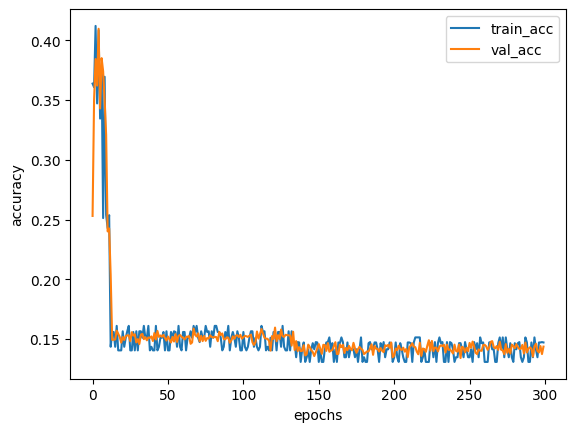

In [34]:
#plot graph
epochs = list(range(100))
plt.plot(hist3.history['val_acc'])
plt.plot(hist3.history['acc'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show

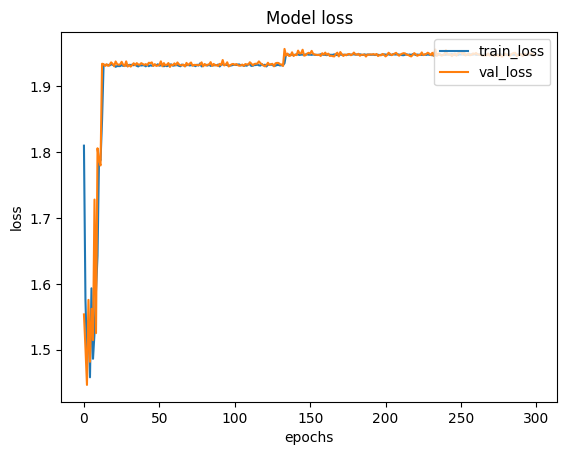

In [35]:
# plot the training artifacts
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [36]:
pred_test = model3.predict(testing_set)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)

104/104 [==============================] - 0s 2ms/step


In [37]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()
df.head(20)

,Predicted Labels,Actual Labels
0,happy,disgust
1,happy,happy
2,happy,sad
3,happy,happy
4,happy,sad
5,happy,surprised
6,happy,disgust
7,happy,sad
8,happy,fearful
9,happy,calm


In [38]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       489
        calm       0.00      0.00      0.00       434
     disgust       0.00      0.00      0.00       502
     fearful       0.00      0.00      0.00       447
       happy       0.15      1.00      0.26       488
         sad       0.00      0.00      0.00       486
   surprised       0.00      0.00      0.00       469

    accuracy                           0.15      3315
   macro avg       0.02      0.14      0.04      3315
weighted avg       0.02      0.15      0.04      3315



# SGD

In [39]:
from tensorflow.keras.layers import concatenate
# define sets of inputs
inputZCR = keras.Input(shape=(x_train_ZCR_RMS[0].shape))
inputSTFT = keras.Input(shape=(x_train_STFT[0].shape))
inputMFCC = keras.Input(shape=(x_train_MFCC[0].shape))
inputMEL = keras.Input(shape=(x_train_Mel[0].shape))

# the first branch operates on the first input
ZCR = Dense(2, activation="relu")(inputZCR)
ZCR = Dense(14, activation="relu")(ZCR)
ZCR = Flatten()(ZCR)
ZCR = Dense(7, activation="relu")(ZCR)
ZCR = keras.Model(inputs=inputZCR, outputs=ZCR)

# the second branch opreates on the second input
#STFT = Conv1D(16, 1, padding='same', activation='relu')(inputSTFT)
#STFT = Flatten()(STFT)
STFT = Dense(12, activation="relu")(inputSTFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dropout(0.2)(STFT)
STFT = Flatten()(STFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dense(7, activation="relu")(STFT)
STFT = keras.Model(inputs=inputSTFT, outputs=STFT)

# the third branch opreates on the third input
#MFCC = Conv1D(32, 1, padding='same', activation='relu')(inputMFCC)
#MFCC = Flatten()(MFCC)
MFCC = Dense(40, activation="relu")(inputMFCC)
MFCC = Flatten()(MFCC)
MFCC = Dense(7, activation="relu")(MFCC)
MFCC = keras.Model(inputs=inputMFCC, outputs=MFCC)

# the forth branch opreates on the forth input
MEL = Dense(256, activation="relu")(inputMEL)
MEL = Dense(128, activation="relu")(MEL)
MEL = Flatten()(MEL)
MEL = Dense(256, activation="relu")(MEL)
MEL = Dropout(0.2)(MEL)
MEL = Dense(64, activation="relu")(MEL)
MEL = Dense(16, activation="relu")(MEL)
MEL = Dense(7, activation="relu")(MEL)
MEL = keras.Model(inputs=inputMEL, outputs=MEL)

print(ZCR.output.shape)
print(STFT.output.shape)

print(MFCC.output.shape)
print(MEL.output.shape)

# combine the output of the two branches
combined_1 = concatenate([ZCR.output, STFT.output])
combined_2 = concatenate([MFCC.output, MEL.output])
combined = concatenate([combined_1, combined_2])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(28, activation="relu")(combined)
z = Dense(56, activation="relu")(z)
#z = Dense(28, activation="relu")(z)
z = Dense(14, activation="relu")(z)
z = Dense(7, activation="softmax")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model4 = keras.Model(inputs=[ZCR.input, STFT.input,MFCC.input,MEL.input], outputs=z)


opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.001)
model4.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

model4.summary()

(None, 7)
(None, 7)
(None, 7)
(None, 7)
Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 dense_85 (Dense)               (None, 256)          33024       ['input_20[0][0]']               
                                                                                                  
 input_18 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_86 (Dense)               (None, 128)          32896       ['dense_85[0][0]']               
                                                   

In [41]:
training_set = [x_train_ZCR_RMS, x_train_STFT, x_train_MFCC, x_train_Mel]
testing_set = [x_test_ZCR_RMS, x_test_STFT, x_test_MFCC, x_test_Mel]

hist4 = model4.fit(x=training_set,y=y_train,
                 batch_size = 64, epochs = 300,
                 validation_data=(testing_set, y_test))

Epoch 1/300
208/208 [==============================] - 1s 5ms/step - loss: 0.8668 - acc: 0.6864 - val_loss: 1.0046 - val_acc: 0.6531
Epoch 2/300
208/208 [==============================] - 1s 5ms/step - loss: 0.8732 - acc: 0.6803 - val_loss: 0.9684 - val_acc: 0.6350
Epoch 3/300
208/208 [==============================] - 1s 5ms/step - loss: 0.8692 - acc: 0.6866 - val_loss: 0.9950 - val_acc: 0.6253
Epoch 4/300
208/208 [==============================] - 1s 5ms/step - loss: 0.8724 - acc: 0.6821 - val_loss: 1.0370 - val_acc: 0.6410
Epoch 5/300
208/208 [==============================] - 1s 5ms/step - loss: 0.8627 - acc: 0.6884 - val_loss: 0.9305 - val_acc: 0.6573
Epoch 6/300
208/208 [==============================] - 1s 5ms/step - loss: 0.8612 - acc: 0.6902 - val_loss: 1.1267 - val_acc: 0.5967
Epoch 7/300
208/208 [==============================] - 1s 5ms/step - loss: 0.8627 - acc: 0.6869 - val_loss: 0.9266 - val_acc: 0.6670
Epoch 8/300
208/208 [==============================] - 1s 5ms/step - 

KeyboardInterrupt: 

In [43]:
print("Accuracy of our model on test data : " , model4.evaluate(testing_set,y_test)[1]*100 , "%")

104/104 [==============================] - 0s 2ms/step - loss: 0.8841 - acc: 0.6760
Accuracy of our model on test data :  67.60181188583374 %


<function matplotlib.pyplot.show(close=None, block=None)>

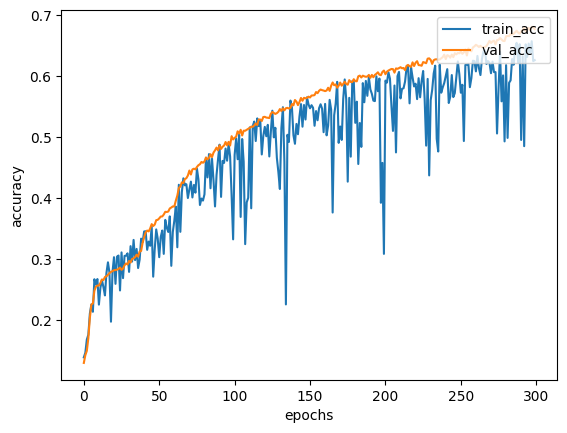

In [44]:
#plot graph
epochs = list(range(100))
plt.plot(hist4.history['val_acc'])
plt.plot(hist4.history['acc'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show

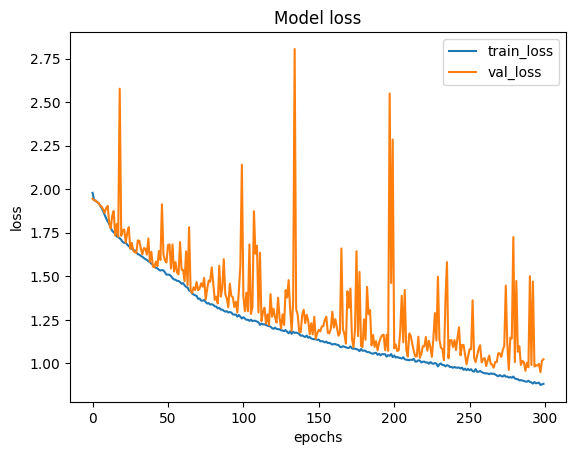

In [45]:
# plot the training artifacts
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [46]:
pred_test = model4.predict(testing_set)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)

104/104 [==============================] - 0s 2ms/step


In [47]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()
df.head(20)

,Predicted Labels,Actual Labels
0,angry,disgust
1,disgust,happy
2,sad,sad
3,happy,happy
4,sad,sad
5,surprised,surprised
6,surprised,disgust
7,sad,sad
8,sad,fearful
9,calm,calm


In [48]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

       angry       0.65      0.79      0.72       489
        calm       0.60      0.74      0.66       434
     disgust       0.71      0.59      0.64       502
     fearful       0.81      0.70      0.75       447
       happy       0.71      0.56      0.62       488
         sad       0.63      0.77      0.69       486
   surprised       0.69      0.59      0.64       469

    accuracy                           0.68      3315
   macro avg       0.69      0.68      0.68      3315
weighted avg       0.69      0.68      0.67      3315



In [49]:
from tensorflow.keras.layers import concatenate
# define sets of inputs
inputZCR = keras.Input(shape=(x_train_ZCR_RMS[0].shape))
inputSTFT = keras.Input(shape=(x_train_STFT[0].shape))
inputMFCC = keras.Input(shape=(x_train_MFCC[0].shape))
inputMEL = keras.Input(shape=(x_train_Mel[0].shape))

# the first branch operates on the first input
ZCR = Dense(2, activation="relu")(inputZCR)
ZCR = Dense(14, activation="relu")(ZCR)
ZCR = Flatten()(ZCR)
ZCR = Dense(7, activation="relu")(ZCR)
ZCR = keras.Model(inputs=inputZCR, outputs=ZCR)

# the second branch opreates on the second input
#STFT = Conv1D(16, 1, padding='same', activation='relu')(inputSTFT)
#STFT = Flatten()(STFT)
STFT = Dense(12, activation="relu")(inputSTFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dropout(0.2)(STFT)
STFT = Flatten()(STFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dense(7, activation="relu")(STFT)
STFT = keras.Model(inputs=inputSTFT, outputs=STFT)

# the third branch opreates on the third input
#MFCC = Conv1D(32, 1, padding='same', activation='relu')(inputMFCC)
#MFCC = Flatten()(MFCC)
MFCC = Dense(40, activation="relu")(inputMFCC)
MFCC = Flatten()(MFCC)
MFCC = Dense(7, activation="relu")(MFCC)
MFCC = keras.Model(inputs=inputMFCC, outputs=MFCC)

# the forth branch opreates on the forth input
MEL = Dense(256, activation="relu")(inputMEL)
MEL = Dense(128, activation="relu")(MEL)
MEL = Flatten()(MEL)
MEL = Dense(256, activation="relu")(MEL)
MEL = Dropout(0.2)(MEL)
MEL = Dense(64, activation="relu")(MEL)
MEL = Dense(16, activation="relu")(MEL)
MEL = Dense(7, activation="relu")(MEL)
MEL = keras.Model(inputs=inputMEL, outputs=MEL)

print(ZCR.output.shape)
print(STFT.output.shape)

print(MFCC.output.shape)
print(MEL.output.shape)

# combine the output of the two branches
combined_1 = concatenate([ZCR.output, STFT.output])
combined_2 = concatenate([MFCC.output, MEL.output])
combined = concatenate([combined_1, combined_2])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(28, activation="relu")(combined)
z = Dense(56, activation="relu")(z)
#z = Dense(28, activation="relu")(z)
z = Dense(14, activation="relu")(z)
z = Dense(7, activation="softmax")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model5 = keras.Model(inputs=[ZCR.input, STFT.input,MFCC.input,MEL.input], outputs=z)

opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.003)
model5.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

model5.summary()

(None, 7)
(None, 7)
(None, 7)
(None, 7)
Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 dense_104 (Dense)              (None, 256)          33024       ['input_24[0][0]']               
                                                                                                  
 input_22 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_105 (Dense)              (None, 128)          32896       ['dense_104[0][0]']              
                                                   

In [50]:
training_set = [x_train_ZCR_RMS, x_train_STFT, x_train_MFCC, x_train_Mel]
testing_set = [x_test_ZCR_RMS, x_test_STFT, x_test_MFCC, x_test_Mel]

hist5 = model5.fit(x=training_set,y=y_train,
                 batch_size = 64, epochs = 300,
                 validation_data=(testing_set, y_test))

Epoch 1/300
208/208 [==============================] - 3s 7ms/step - loss: 1.9485 - acc: 0.1466 - val_loss: 1.9432 - val_acc: 0.1487
Epoch 2/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9429 - acc: 0.1473 - val_loss: 1.9405 - val_acc: 0.1400
Epoch 3/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9405 - acc: 0.1573 - val_loss: 1.9382 - val_acc: 0.1789
Epoch 4/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9382 - acc: 0.1651 - val_loss: 1.9356 - val_acc: 0.1961
Epoch 5/300
208/208 [==============================] - 1s 6ms/step - loss: 1.9354 - acc: 0.1907 - val_loss: 1.9324 - val_acc: 0.2154
Epoch 6/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9317 - acc: 0.2019 - val_loss: 1.9280 - val_acc: 0.2305
Epoch 7/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9272 - acc: 0.2127 - val_loss: 1.9216 - val_acc: 0.2356
Epoch 8/300
208/208 [==============================] - 1s 5ms/step - 

208/208 [==============================] - 1s 5ms/step - loss: 0.7856 - acc: 0.7211 - val_loss: 0.9941 - val_acc: 0.6576
Epoch 124/300
208/208 [==============================] - 1s 5ms/step - loss: 0.7812 - acc: 0.7272 - val_loss: 0.9432 - val_acc: 0.6833
Epoch 125/300
208/208 [==============================] - 1s 5ms/step - loss: 0.7754 - acc: 0.7266 - val_loss: 0.9426 - val_acc: 0.6778
Epoch 126/300
208/208 [==============================] - 1s 5ms/step - loss: 0.7648 - acc: 0.7273 - val_loss: 0.9691 - val_acc: 0.6676
Epoch 127/300
208/208 [==============================] - 1s 5ms/step - loss: 0.7718 - acc: 0.7284 - val_loss: 0.9540 - val_acc: 0.6615
Epoch 128/300
208/208 [==============================] - 1s 5ms/step - loss: 0.7629 - acc: 0.7275 - val_loss: 1.0639 - val_acc: 0.6471
Epoch 129/300
208/208 [==============================] - 1s 6ms/step - loss: 0.7612 - acc: 0.7325 - val_loss: 1.0130 - val_acc: 0.6570
Epoch 130/300
208/208 [==============================] - 1s 5ms/step 

Epoch 184/300
208/208 [==============================] - 1s 5ms/step - loss: 0.5984 - acc: 0.7830 - val_loss: 1.1444 - val_acc: 0.6703
Epoch 185/300
208/208 [==============================] - 1s 6ms/step - loss: 0.5745 - acc: 0.7919 - val_loss: 0.9685 - val_acc: 0.7041
Epoch 186/300
208/208 [==============================] - 1s 6ms/step - loss: 0.5922 - acc: 0.7883 - val_loss: 0.9943 - val_acc: 0.6854
Epoch 187/300
208/208 [==============================] - 1s 7ms/step - loss: 0.5949 - acc: 0.7862 - val_loss: 1.1389 - val_acc: 0.6836
Epoch 188/300
208/208 [==============================] - 1s 6ms/step - loss: 0.5715 - acc: 0.7903 - val_loss: 1.0517 - val_acc: 0.6790
Epoch 189/300
208/208 [==============================] - 1s 6ms/step - loss: 0.5866 - acc: 0.7834 - val_loss: 1.0676 - val_acc: 0.6863
Epoch 190/300
208/208 [==============================] - 1s 6ms/step - loss: 0.6009 - acc: 0.7840 - val_loss: 0.9470 - val_acc: 0.6977
Epoch 191/300
208/208 [==============================] 

In [51]:
print("Accuracy of our model on test data : " , model5.evaluate(testing_set,y_test)[1]*100 , "%")

104/104 [==============================] - 0s 3ms/step - loss: 1.0419 - acc: 0.7357
Accuracy of our model on test data :  73.57466220855713 %


<function matplotlib.pyplot.show(close=None, block=None)>

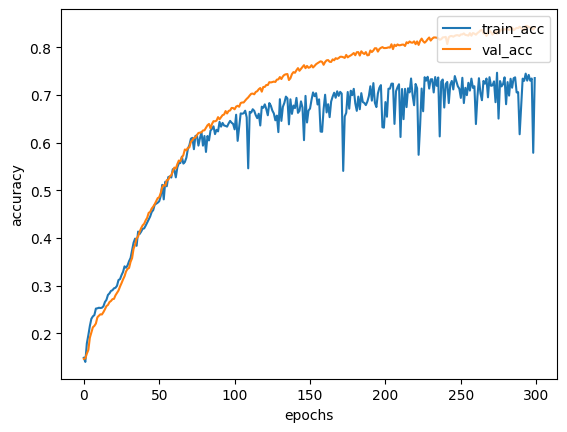

In [52]:
#plot graph
epochs = list(range(100))
plt.plot(hist5.history['val_acc'])
plt.plot(hist5.history['acc'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show

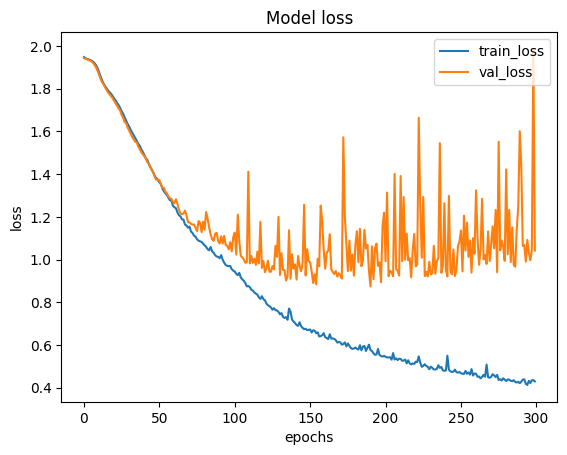

In [53]:
# plot the training artifacts
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [54]:
pred_test = model5.predict(testing_set)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)

104/104 [==============================] - 0s 2ms/step


In [55]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()
df.head(20)

,Predicted Labels,Actual Labels
0,disgust,disgust
1,happy,happy
2,sad,sad
3,surprised,happy
4,sad,sad
5,surprised,surprised
6,surprised,disgust
7,sad,sad
8,calm,fearful
9,sad,calm


In [56]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

       angry       0.91      0.82      0.86       489
        calm       0.73      0.91      0.81       434
     disgust       0.78      0.51      0.62       502
     fearful       0.83      0.74      0.78       447
       happy       0.72      0.69      0.71       488
         sad       0.66      0.78      0.72       486
   surprised       0.60      0.73      0.66       469

    accuracy                           0.74      3315
   macro avg       0.75      0.74      0.74      3315
weighted avg       0.75      0.74      0.73      3315



In [57]:
from tensorflow.keras.layers import concatenate
# define sets of inputs
inputZCR = keras.Input(shape=(x_train_ZCR_RMS[0].shape))
inputSTFT = keras.Input(shape=(x_train_STFT[0].shape))
inputMFCC = keras.Input(shape=(x_train_MFCC[0].shape))
inputMEL = keras.Input(shape=(x_train_Mel[0].shape))

# the first branch operates on the first input
ZCR = Dense(2, activation="relu")(inputZCR)
ZCR = Dense(14, activation="relu")(ZCR)
ZCR = Flatten()(ZCR)
ZCR = Dense(7, activation="relu")(ZCR)
ZCR = keras.Model(inputs=inputZCR, outputs=ZCR)

# the second branch opreates on the second input
#STFT = Conv1D(16, 1, padding='same', activation='relu')(inputSTFT)
#STFT = Flatten()(STFT)
STFT = Dense(12, activation="relu")(inputSTFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dropout(0.2)(STFT)
STFT = Flatten()(STFT)
STFT = Dense(24, activation="relu")(STFT)
STFT = Dense(7, activation="relu")(STFT)
STFT = keras.Model(inputs=inputSTFT, outputs=STFT)

# the third branch opreates on the third input
#MFCC = Conv1D(32, 1, padding='same', activation='relu')(inputMFCC)
#MFCC = Flatten()(MFCC)
MFCC = Dense(40, activation="relu")(inputMFCC)
MFCC = Flatten()(MFCC)
MFCC = Dense(7, activation="relu")(MFCC)
MFCC = keras.Model(inputs=inputMFCC, outputs=MFCC)

# the forth branch opreates on the forth input
MEL = Dense(256, activation="relu")(inputMEL)
MEL = Dense(128, activation="relu")(MEL)
MEL = Flatten()(MEL)
MEL = Dense(256, activation="relu")(MEL)
MEL = Dropout(0.2)(MEL)
MEL = Dense(64, activation="relu")(MEL)
MEL = Dense(16, activation="relu")(MEL)
MEL = Dense(7, activation="relu")(MEL)
MEL = keras.Model(inputs=inputMEL, outputs=MEL)

print(ZCR.output.shape)
print(STFT.output.shape)

print(MFCC.output.shape)
print(MEL.output.shape)

# combine the output of the two branches
combined_1 = concatenate([ZCR.output, STFT.output])
combined_2 = concatenate([MFCC.output, MEL.output])
combined = concatenate([combined_1, combined_2])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(28, activation="relu")(combined)
z = Dense(56, activation="relu")(z)
#z = Dense(28, activation="relu")(z)
z = Dense(14, activation="relu")(z)
z = Dense(7, activation="softmax")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model6 = keras.Model(inputs=[ZCR.input, STFT.input,MFCC.input,MEL.input], outputs=z)

opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.03)
model6.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

model6.summary()

(None, 7)
(None, 7)
(None, 7)
(None, 7)
Model: "model_34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 dense_123 (Dense)              (None, 256)          33024       ['input_28[0][0]']               
                                                                                                  
 input_26 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_124 (Dense)              (None, 128)          32896       ['dense_123[0][0]']              
                                                   

In [58]:
training_set = [x_train_ZCR_RMS, x_train_STFT, x_train_MFCC, x_train_Mel]
testing_set = [x_test_ZCR_RMS, x_test_STFT, x_test_MFCC, x_test_Mel]

hist6 = model6.fit(x=training_set,y=y_train,
                 batch_size = 64, epochs = 300,
                 validation_data=(testing_set, y_test))

Epoch 1/300
208/208 [==============================] - 3s 7ms/step - loss: 1.9596 - acc: 0.1682 - val_loss: 1.9419 - val_acc: 0.1756
Epoch 2/300
208/208 [==============================] - 1s 5ms/step - loss: 1.9333 - acc: 0.1799 - val_loss: 1.9104 - val_acc: 0.1906
Epoch 3/300
208/208 [==============================] - 1s 5ms/step - loss: 1.8521 - acc: 0.1943 - val_loss: 1.7905 - val_acc: 0.2682
Epoch 4/300
208/208 [==============================] - 1s 5ms/step - loss: 1.7475 - acc: 0.2791 - val_loss: 1.7709 - val_acc: 0.3080
Epoch 5/300
208/208 [==============================] - 1s 6ms/step - loss: 1.6686 - acc: 0.3125 - val_loss: 1.6208 - val_acc: 0.3315
Epoch 6/300
208/208 [==============================] - 1s 6ms/step - loss: 1.5798 - acc: 0.3592 - val_loss: 1.5232 - val_acc: 0.3822
Epoch 7/300
208/208 [==============================] - 1s 5ms/step - loss: 1.5036 - acc: 0.3989 - val_loss: 1.7221 - val_acc: 0.3620
Epoch 8/300
208/208 [==============================] - 1s 5ms/step - 

208/208 [==============================] - 1s 5ms/step - loss: 0.3821 - acc: 0.8555 - val_loss: 1.1083 - val_acc: 0.7216
Epoch 124/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3849 - acc: 0.8539 - val_loss: 0.9676 - val_acc: 0.7288
Epoch 125/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3709 - acc: 0.8586 - val_loss: 1.3477 - val_acc: 0.6842
Epoch 126/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3952 - acc: 0.8494 - val_loss: 1.1233 - val_acc: 0.7228
Epoch 127/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3666 - acc: 0.8603 - val_loss: 0.8613 - val_acc: 0.7635
Epoch 128/300
208/208 [==============================] - 1s 6ms/step - loss: 0.3714 - acc: 0.8586 - val_loss: 1.0784 - val_acc: 0.7412
Epoch 129/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3659 - acc: 0.8614 - val_loss: 0.8440 - val_acc: 0.7689
Epoch 130/300
208/208 [==============================] - 1s 5ms/step 

Epoch 184/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3102 - acc: 0.8827 - val_loss: 0.9572 - val_acc: 0.7608
Epoch 185/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3041 - acc: 0.8840 - val_loss: 0.9476 - val_acc: 0.7750
Epoch 186/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3037 - acc: 0.8848 - val_loss: 0.9643 - val_acc: 0.7602
Epoch 187/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3148 - acc: 0.8807 - val_loss: 0.9370 - val_acc: 0.7765
Epoch 188/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3134 - acc: 0.8812 - val_loss: 1.1438 - val_acc: 0.7532
Epoch 189/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3324 - acc: 0.8766 - val_loss: 0.9031 - val_acc: 0.7725
Epoch 190/300
208/208 [==============================] - 1s 5ms/step - loss: 0.3073 - acc: 0.8835 - val_loss: 0.9178 - val_acc: 0.7753
Epoch 191/300
208/208 [==============================] 

In [59]:
print("Accuracy of our model on test data : " , model6.evaluate(testing_set,y_test)[1]*100 , "%")

104/104 [==============================] - 0s 4ms/step - loss: 1.0732 - acc: 0.7934
Accuracy of our model on test data :  79.33635115623474 %


<function matplotlib.pyplot.show(close=None, block=None)>

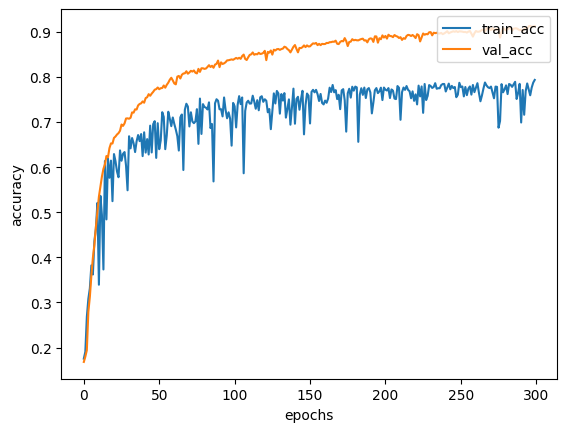

In [60]:
#plot graph
epochs = list(range(100))
plt.plot(hist6.history['val_acc'])
plt.plot(hist6.history['acc'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show

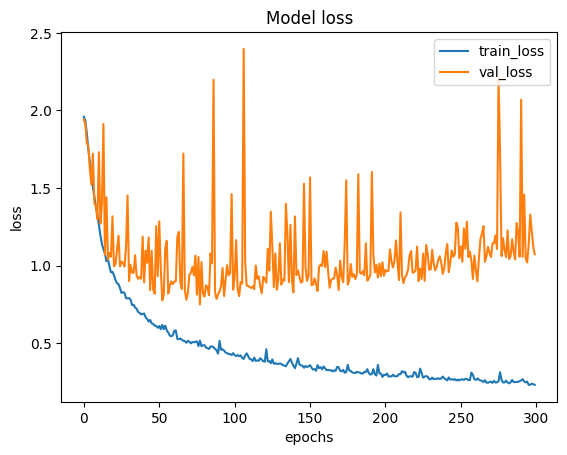

In [61]:
# plot the training artifacts
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [62]:
pred_test = model6.predict(testing_set)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)

104/104 [==============================] - 0s 2ms/step


In [63]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()
df.head(20)

,Predicted Labels,Actual Labels
0,disgust,disgust
1,happy,happy
2,sad,sad
3,angry,happy
4,sad,sad
5,surprised,surprised
6,disgust,disgust
7,sad,sad
8,sad,fearful
9,disgust,calm


In [64]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

       angry       0.86      0.87      0.87       489
        calm       0.80      0.90      0.85       434
     disgust       0.65      0.76      0.70       502
     fearful       0.90      0.76      0.82       447
       happy       0.77      0.74      0.76       488
         sad       0.85      0.77      0.81       486
   surprised       0.78      0.75      0.77       469

    accuracy                           0.79      3315
   macro avg       0.80      0.79      0.80      3315
weighted avg       0.80      0.79      0.79      3315



In [65]:
tf.keras.models.save_model(model2, 'model2_multi_input_ADAM.h5')
tf.keras.models.save_model(model3, 'model3_multi_input_ADAM.h5')
tf.keras.models.save_model(model4, 'model4_multi_input_SGD.h5')
tf.keras.models.save_model(model5, 'model5_multi_input_SGD.h5')
tf.keras.models.save_model(model6, 'model6_multi_input_SGD.h5')